In [ ]:
!pip install seaborn

In [ ]:
import plotly.figure_factory as ff
import numpy as N
x = N.random.randn(500)
data = [x]
label = ['DISTPLOT'] 
output = ff.create_distplot(data, label)
output.show()

In [ ]:
import torch
similarities = torch.load('../datasets/embeddings/similarity_result.pt')

In [ ]:
similarities[list(similarities.keys())[0]]

In [ ]:
import plotly.figure_factory as ff
import numpy as N
# x = N.random.randn(500)
# data = [x]
data = []
for key in similarities.keys():
    data.append([similarities[key]])
    for poc in similarities[key]:
        print(len(similarities[key]))
        data.append([similarities[key][poc]])
    break
    
label = ['DISTPLOT'] 
output = ff.create_distplot(data, label)
output.show()

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff


fig = go.Figure()

pocs = []
values = []
for key in similarities.keys():
    for poc in similarities[key]:
        pocs.append(poc)
        try:
            values.append(similarities[key][poc].item())
        except:
            values.append(similarities[key][poc])
    break




trace1 = go.Scatter(x=pocs, y=values,
                    marker=dict(color='#0099ff'),
                    name='Similarity With Pocs',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
# fig.layout.margin.update({'t':50, 'b':100})
# fig.layout.update({'title': '2016 Hockey Stats'})

fig.show()

In [ ]:
import plotly.graph_objects as go

import numpy as np

x0 = np.random.randn(2000)
print((x0))
x1 = np.random.randn(2000) + 1
print((x1))
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
mapping = {}
i = 1
for key in similarities.keys():
    for poc in similarities[key]:
        mapping[poc] = i
        i += 1
    break

In [ ]:
mapping

In [ ]:
import seaborn
import pandas
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(40,10)})
plt.ylim(0,1)
plt.xlim(0, 108)
i = 6
for key in similarities.keys():
    if i == 0:
        break
    i -= 1
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            values.append(similarities[key][poc].item())
        except:
            values.append(similarities[key][poc])
    res = seaborn.lineplot(x=pocs, y=values, label=key)
    res.set(xticks= pocs)
    
plt.show()



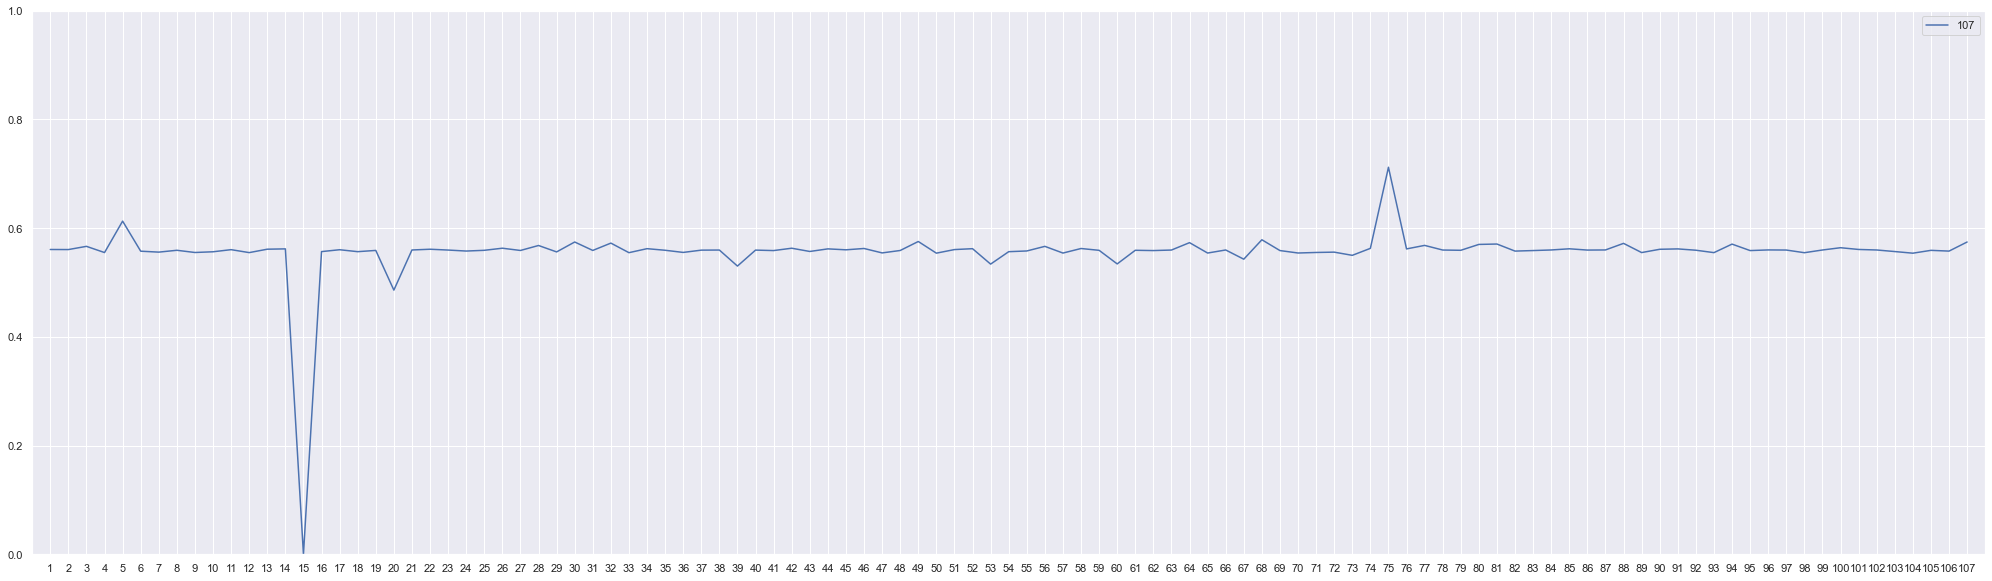

In [43]:
import seaborn
import pandas
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(35,10)})
plt.ylim(0,1)
plt.xlim(0, 108)
count = 0
acc = {}
for key in similarities.keys():
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            a = acc[mapping[poc]]
        except:
            acc[mapping[poc]] = 0
        try:
            acc[mapping[poc]] += similarities[key][poc].item()
        except:
            acc[mapping[poc]] += similarities[key][poc]
    count += 1

means = []
for key in acc.keys():
    means.append(acc[key]/count)


res = seaborn.lineplot(x=pocs, y=means, label=key)
res.set(xticks= pocs)
    
plt.show()

